***Importing Necessary tools***


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


***Loading Dataset***

In [2]:
train_data=pd.read_csv('titanic_train.csv')
test_data=pd.read_csv('titanic_test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Checking null values

In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

***Data_Preprocessing***

In both data PassengerID and Ticket is not related to survived data . So better dropping these

In [7]:
train_data=train_data.drop(columns=['PassengerId','Ticket'],axis=1)
test_data=test_data.drop(columns=['PassengerId','Ticket'],axis=1)

In [8]:
train_data['Age']=train_data['Age'].fillna(train_data['Age'].median())
test_data['Age']=test_data['Age'].fillna(test_data['Age'].median())

In [9]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [10]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
train_data.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


In [12]:
test_data.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [13]:
train_data.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,1.0


In [14]:
most_frequent = train_data['Embarked'].mode()[0] #Procurok mane mode()[0]
train_data['Embarked'].fillna(most_frequent, inplace=True)


In [15]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [16]:
train_data.replace({'Sex':{'male':0,'female':1}},inplace=True)

In [17]:
test_data.replace({'Sex':{'male':0,'female':1}},inplace=True)

In [18]:
test_data['Fare'].fillna(test_data.groupby('Pclass')['Fare'].transform('median'),inplace=True)

In [19]:
train_data['Cabin']=train_data['Cabin'].str[:1]

In [20]:
test_data['Cabin']=test_data['Cabin'].str[:1]

In [21]:
train_data['Cabin'].value_counts()

Cabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [22]:
train_data.replace({'Cabin':{'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2,'G':2.4,'T':2.8}},inplace=True)

In [23]:
test_data.replace({'Cabin':{'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2,'G':2.4,'T':2.8}},inplace=True)

In [24]:
test_data['Cabin'].fillna(test_data.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

In [25]:
train_data['Cabin'].fillna(train_data.groupby('Pclass')['Cabin'].transform('median'),inplace=True) # () er sapekkhe []

In [26]:
train_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [27]:
test_data.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [28]:
train_data=train_data.drop('Name',axis=1)

In [29]:
test_data=test_data.drop('Name',axis=1)

In [30]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,2.0,0.0
1,1,1,1,38.0,1,0,71.2833,0.8,1.0
2,1,3,1,26.0,0,0,7.9250,2.0,0.0
3,1,1,1,35.0,1,0,53.1000,0.8,0.0
4,0,3,0,35.0,0,0,8.0500,2.0,0.0
5,0,3,0,28.0,0,0,8.4583,2.0,2.0
6,0,1,0,54.0,0,0,51.8625,1.6,0.0
7,0,3,0,2.0,3,1,21.0750,2.0,0.0
8,1,3,1,27.0,0,2,11.1333,2.0,0.0
9,1,2,1,14.0,1,0,30.0708,1.8,1.0


In [31]:
test_data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,34.5,0,0,7.8292,2.0,2
1,3,1,47.0,1,0,7.0000,2.0,0
2,2,0,62.0,0,0,9.6875,2.0,2
3,3,0,27.0,0,0,8.6625,2.0,0
4,3,1,22.0,1,1,12.2875,2.0,0
5,3,0,14.0,0,0,9.2250,2.0,0
6,3,1,30.0,0,0,7.6292,2.0,2
7,2,0,26.0,1,1,29.0000,2.0,0
8,3,1,18.0,0,0,7.2292,2.0,1
9,3,0,21.0,2,0,24.1500,2.0,0


***Visualization***

In [32]:
import matplotlib.pyplot as plt

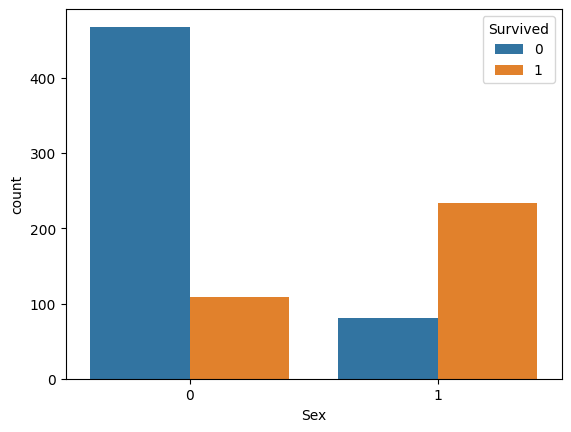

In [33]:
sns.countplot(data=train_data, x='Sex', hue='Survived')
plt.show()

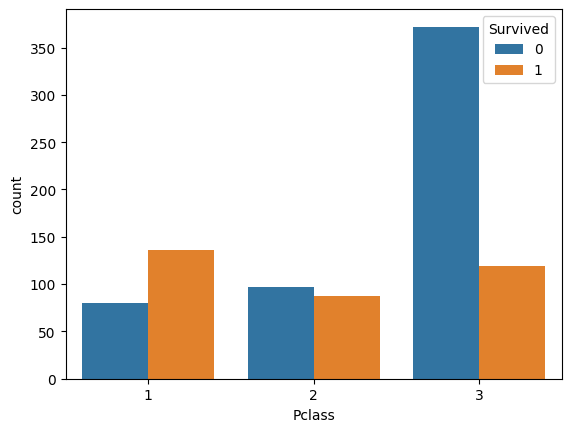

In [34]:
sns.countplot(data=train_data, x='Pclass', hue='Survived')
plt.show()

<Figure size 1200x600 with 0 Axes>

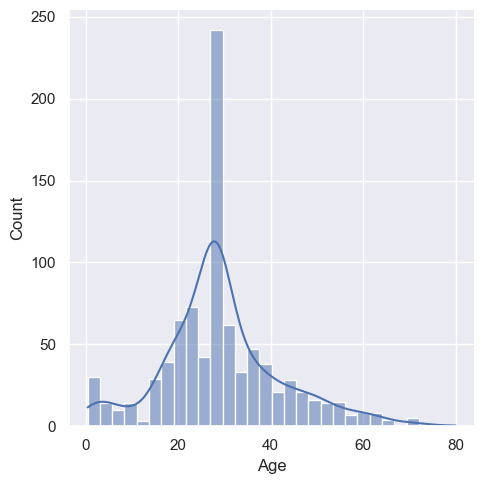

In [35]:
sns.set()
plt.figure(figsize=(12,6))
sns.displot(train_data['Age'],kde=True)

***Splitting***

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
X = train_data.drop('Survived',axis=1)
y = train_data['Survived']

In [38]:
scaler = StandardScaler()


In [39]:
scaler.fit_transform(X)

array([[ 0.82737724, -0.73769513, -0.56573646, ..., -0.50244517,
         0.61184462, -0.56883712],
       [-1.56610693,  1.35557354,  0.66386103, ...,  0.78684529,
        -1.61024869,  1.00518113],
       [ 0.82737724,  1.35557354, -0.25833709, ..., -0.48885426,
         0.61184462, -0.56883712],
       ...,
       [ 0.82737724,  1.35557354, -0.1046374 , ..., -0.17626324,
         0.61184462, -0.56883712],
       [-1.56610693, -0.73769513, -0.25833709, ..., -0.04438104,
        -1.61024869,  1.00518113],
       [ 0.82737724, -0.73769513,  0.20276197, ..., -0.49237783,
         0.61184462,  2.57919938]])

Train Test Split

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

***LogisticRegression***

In [41]:
lreg=LogisticRegression()


In [42]:
lreg.fit(X_train,y_train)

C:\Users\Apple store\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
y_pred=lreg.predict(X_test)

In [45]:
lreg.score(X_test,y_test)

0.776536312849162

***Support_Vector_Machine***

In [46]:
model = SVC()

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {
    'C': [1,5,10,15],
    'kernel': ['linear', 'rbf', 'poly'],
}
grid_search = GridSearchCV(model, param_grid, cv=5 )

In [49]:
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15],
                         'kernel': ['linear', 'rbf', 'poly']})

In [50]:
grid_search.best_params_

{'C': 1, 'kernel': 'linear'}

In [51]:
applicable_model = SVC(C=1,kernel='linear')

In [52]:
applicable_model.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [53]:
applicable_model.score(X_test,y_test)

0.7821229050279329

***Naive_Bayes***

In [54]:
MODEL=GaussianNB()

In [55]:
MODEL.fit(X_train,y_train)

GaussianNB()

In [56]:
MODEL.score(X_test,y_test)

0.7486033519553073

***XGBClassifier***

In [57]:
xgb=XGBClassifier()

In [58]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [59]:
xgb.score(X_test,y_test)

0.776536312849162

***ExtraTreeClassifer***

In [60]:
tclf=ExtraTreeClassifier()

In [61]:
tclf.fit(X_train,y_train)

ExtraTreeClassifier()

In [62]:
tclf.score(X_test,y_test)

0.7262569832402235

***DecisionTreeClassifier***

In [63]:
dtclf=DecisionTreeClassifier()

In [64]:
dtclf.fit(X_train,y_train)

DecisionTreeClassifier()

In [65]:
dtclf.score(X_test,y_test)

0.770949720670391

***RandomForestClassifier***

In [66]:
rclf=RandomForestClassifier()

In [71]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],  
    'max_features': ['auto', 'sqrt', 'log2'],  
    'max_depth': [None, 10, 20, 30, 40],  
    'min_samples_split': [2, 5, 10],  
    'bootstrap': [True, False]  
}
grid_search_forest = GridSearchCV(rclf, param_grid, cv=5)

In [72]:
grid_search_forest.fit(X,y)

C:\Users\Apple store\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
600 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Apple store\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Apple store\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Apple store\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]})

In [74]:
grid_search_forest.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_split': 5,
 'n_estimators': 100}

In [75]:
ranclf=RandomForestClassifier(n_estimators=100,max_features='log2',max_depth=20,min_samples_split=5,bootstrap=True)

In [76]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [77]:
kf=KFold(n_splits=10,shuffle=True,random_state=1)

In [78]:
score = cross_val_score(ranclf, X_train, y_train, cv=kf, scoring='accuracy')

In [79]:
score.mean()

0.8370109546165885